William Vann Homework 6

Principal Findings:


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
from pprint import pprint

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities_550.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Populate cities_dict with imperial weather data from OpenWeatherMap API
    
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "imperial"

cities_dict = {}

for num,city in enumerate(cities[:551]):
        
    query_url = f"{base_url}appid={api_key}&q={city}&units={units}"

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Structure and initialize cities_dict
    
    cities_dict[city] = {
    
            "JSON": weather_json, "DATE": "NULL", "CITY": "NULL", "COUNTRY": "NULL",
            "LAT": 0.0, "LNG": 0.0, "MAX_TEMP": 0.0, "HUMIDITY": 0.0, 
            "CLOUDINESS": 0.0, "WIND_SPEED": 0.0    
    
                        }
    
    # Add relevant data points from json to cities_dict
    
    try:
        
        cities_dict[city]["DATE"] = weather_json["dt"]
        cities_dict[city]["CITY"] = weather_json["name"]
        cities_dict[city]["COUNTRY"] = weather_json["sys"]["country"]         
        cities_dict[city]["LAT"] = weather_json["coord"]["lat"]
        cities_dict[city]["LNG"] = weather_json["coord"]["lon"]
        cities_dict[city]["MAX_TEMP"] = weather_json["main"]["temp"]
        cities_dict[city]["HUMIDITY"] = weather_json["main"]["humidity"]
        cities_dict[city]["CLOUDINESS"] = weather_json["clouds"]["all"]     
        cities_dict[city]["WIND_SPEED"] =  weather_json["wind"]["speed"]
        
    except (KeyError, IndexError):
        
        print(f"{num} Info missing for {city} ... skipping!")
        continue
        
    else:
        
        print(f"{num} Working on {city} ...")
        
    finally:
        
        # timeout
        
        time.sleep(1.5)

print(f"DONE!")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
df = pd.DataFrame([cities_dict[city] for city in cities_dict.keys()])

# toss the rows where api data not available

df_ = df.loc[(df["DATE"] != "NULL"), :]

df_.head()

In [ ]:
df = df_.copy()

df.to_csv("../output_data/cities_550.csv")

In [3]:
cityweather_df = pd.read_csv("../output_data/cities_550.csv")

del cityweather_df["Unnamed: 0"]

cityweather_df.head()

,JSON,DATE,CITY,COUNTRY,LAT,LNG,MAX_TEMP,HUMIDITY,CLOUDINESS,WIND_SPEED
0,"{'coord': {'lon': -175.2, 'lat': -21.2}, 'weat...",2022-07-31 02:58:16,Vaini,TO,-21.2000,-175.2000,80.76,89.0,40.0,10.36
1,"{'coord': {'lon': -122.4286, 'lat': 37.4636}, ...",2022-07-31 02:58:18,Half Moon Bay,US,37.4636,-122.4286,62.33,87.0,100.0,16.11
2,"{'coord': {'lon': 168.3333, 'lat': -46.6}, 'we...",2022-07-31 02:58:19,Bluff,NZ,-46.6000,168.3333,47.80,77.0,49.0,16.26
3,"{'coord': {'lon': -79.2353, 'lat': 42.097}, 'w...",2022-07-31 02:58:21,Jamestown,US,42.0970,-79.2353,61.48,55.0,1.0,1.63
4,"{'coord': {'lon': -73.9662, 'lat': 42.6001}, '...",2022-07-31 02:57:37,Albany,US,42.6001,-73.9662,65.89,78.0,0.0,4.85


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# chaining calls on cityweather_df to check humidity > 100%

(cityweather_df

     .HUMIDITY
     .gt(100)
     .sum()
)

In [ ]:
#  Get the indices of cities that have humidity over 100%.



In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

cityweather_df

,JSON,DATE,CITY,COUNTRY,LAT,LNG,MAX_TEMP,HUMIDITY,CLOUDINESS,WIND_SPEED
0,"{'coord': {'lon': -175.2, 'lat': -21.2}, 'weat...",2022-07-31 02:58:16,Vaini,TO,-21.2000,-175.2000,80.76,89.0,40.0,10.36
1,"{'coord': {'lon': -122.4286, 'lat': 37.4636}, ...",2022-07-31 02:58:18,Half Moon Bay,US,37.4636,-122.4286,62.33,87.0,100.0,16.11
2,"{'coord': {'lon': 168.3333, 'lat': -46.6}, 'we...",2022-07-31 02:58:19,Bluff,NZ,-46.6000,168.3333,47.80,77.0,49.0,16.26
3,"{'coord': {'lon': -79.2353, 'lat': 42.097}, 'w...",2022-07-31 02:58:21,Jamestown,US,42.0970,-79.2353,61.48,55.0,1.0,1.63
4,"{'coord': {'lon': -73.9662, 'lat': 42.6001}, '...",2022-07-31 02:57:37,Albany,US,42.6001,-73.9662,65.89,78.0,0.0,4.85
...,...,...,...,...,...,...,...,...,...,...
498,"{'coord': {'lon': -157.8378, 'lat': 21.4447}, ...",2022-07-31 03:15:04,‘Āhuimanu,US,21.4447,-157.8378,81.55,71.0,75.0,16.11
499,"{'coord': {'lon': 36.8595, 'lat': 49.4627}, 'w...",2022-07-31 03:15:06,Balakliya,UA,49.4627,36.8595,60.71,71.0,0.0,6.76
500,"{'coord': {'lon': -60.2177, 'lat': 46.2367}, '...",2022-07-31 03:15:09,Sydney Mines,CA,46.2367,-60.2177,64.26,94.0,75.0,10.36
501,"{'coord': {'lon': 44.8414, 'lat': 51.5506}, 'w...",2022-07-31 03:15:11,Lysyye Gory,RU,51.5506,44.8414,65.25,86.0,100.0,9.40


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The correlation between both factors is 0.02


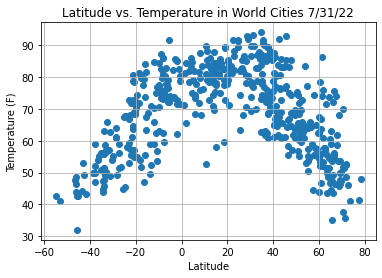

In [5]:
plt.scatter(cityweather_df["LAT"], cityweather_df["MAX_TEMP"], marker="o")

plt.title("Latitude vs. Temperature in World Cities 7/31/22")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/TempsInWorldCities_7_31_2022.png")

correlation = pearsonr(cityweather_df["LAT"], cityweather_df["MAX_TEMP"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

The correlation between both factors is 0.03


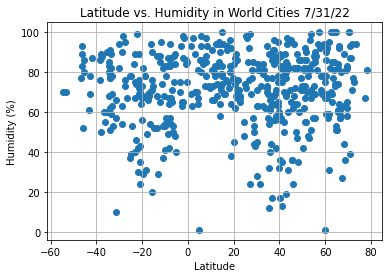

In [6]:
plt.scatter(cityweather_df["LAT"], cityweather_df["HUMIDITY"], marker="o")

plt.title("Latitude vs. Humidity in World Cities 7/31/22")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/HumidsInWorldCities_7_31_2022.png")

correlation = pearsonr(cityweather_df["LAT"], cityweather_df["HUMIDITY"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

The correlation between both factors is 0.11


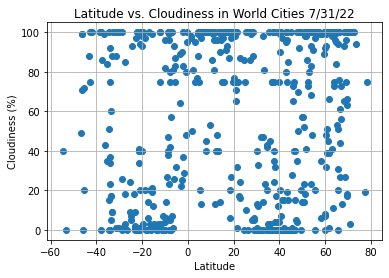

In [7]:
plt.scatter(cityweather_df["LAT"], cityweather_df["CLOUDINESS"], marker="o")

plt.title("Latitude vs. Cloudiness in World Cities 7/31/22")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/CloudsInWorldCities_7_31_2022.png")

correlation = pearsonr(cityweather_df["LAT"], cityweather_df["CLOUDINESS"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

The correlation between both factors is -0.09


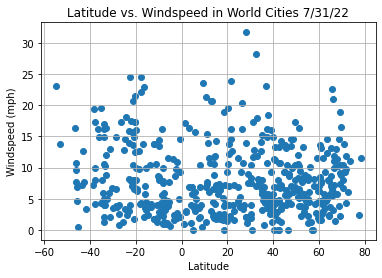

In [8]:
plt.scatter(cityweather_df["LAT"], cityweather_df["WIND_SPEED"], marker="o")

plt.title("Latitude vs. Windspeed in World Cities 7/31/22")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/WindsInWorldCities_7_31_2022.png")

correlation = pearsonr(cityweather_df["LAT"], cityweather_df["WIND_SPEED"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

## Linear Regression

In [9]:
# assign 0 to all cities

cityweather_df["HEMISPHERE"] = 0

# assign 1 to only Northern Hemisphere cities

cityweather_df.loc[(cityweather_df["LAT"] >= 0), "HEMISPHERE"] = 1

# named series for regressions

northern_latitudes = cityweather_df["HEMISPHERE"] == 1
southern_latitudes = cityweather_df["HEMISPHERE"] == 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

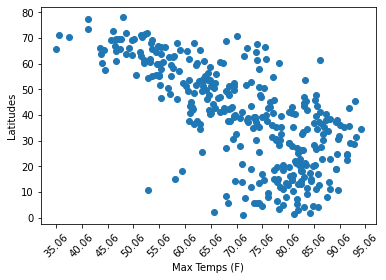

The correlation between both factors is -0.69


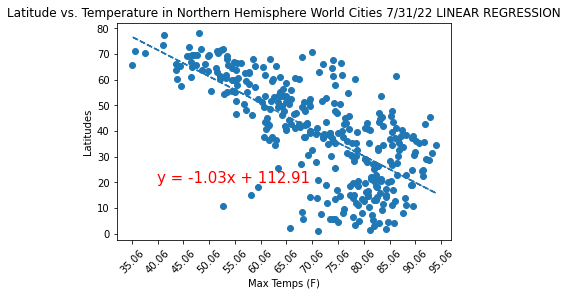

In [12]:
maxtemps = cityweather_df[northern_latitudes]["MAX_TEMP"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(maxtemps, latitudes)
plt.xticks(np.arange(min(maxtemps), max(maxtemps) + 1, 5.0), rotation=45)
plt.xlabel("Max Temps (F)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(maxtemps, latitudes) 

a_fit = a_slope * maxtemps + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(maxtemps, latitudes)
plt.plot(maxtemps, a_fit, "--")

plt.xticks(np.arange(min(maxtemps), max(maxtemps) + 1, 5.0), rotation=45)

# plt.xticks(maxtemps, rotation=90)

plt.title("Latitude vs. Temperature in Northern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Max Temps (F)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, maxtemps)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (40,20), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

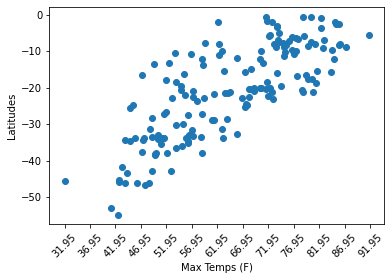

The correlation between both factors is 0.79


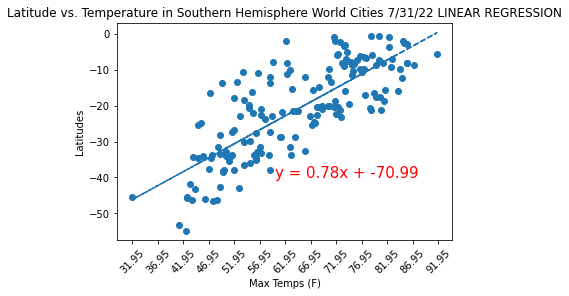

In [15]:
maxtemps = cityweather_df[southern_latitudes]["MAX_TEMP"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(maxtemps, latitudes)
plt.xticks(np.arange(min(maxtemps), max(maxtemps) + 1, 5.0), rotation=45)
plt.xlabel("Max Temps (F)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(maxtemps, latitudes) 

a_fit = a_slope * maxtemps + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(maxtemps, latitudes)
plt.plot(maxtemps, a_fit, "--")
plt.xticks(np.arange(min(maxtemps), max(maxtemps) + 1, 5.0), rotation=45)

plt.title("Latitude vs. Temperature in Southern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Max Temps (F)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, maxtemps)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (60,-40), fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

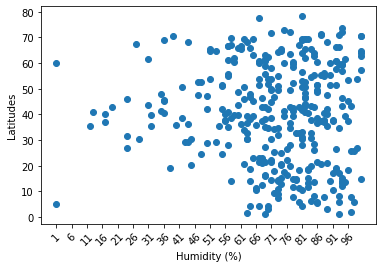

The correlation between both factors is -0.05


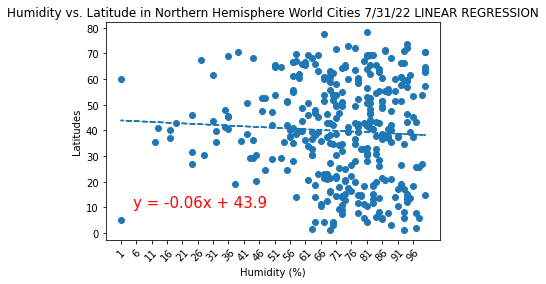

In [18]:
humidities = cityweather_df[northern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(humidities, latitudes)
plt.xticks(np.arange(min(humidities), max(humidities) + 1, 5.0), rotation=45)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(humidities, latitudes) 

a_fit = a_slope * humidities + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(humidities, latitudes)
plt.plot(humidities, a_fit, "--")
plt.xticks(np.arange(min(humidities), max(humidities) + 1, 5.0), rotation=45)

plt.title("Humidity vs. Latitude in Northern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, humidities)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (5,10), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

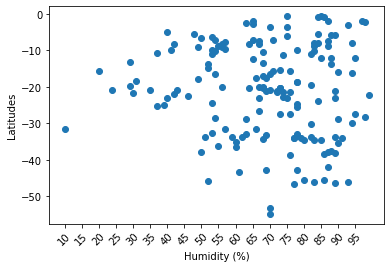

The correlation between both factors is -0.08


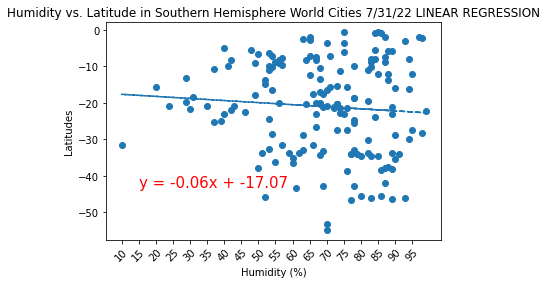

In [23]:
humidities = cityweather_df[southern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(humidities, latitudes)
plt.xticks(np.arange(min(humidities), max(humidities) + 1, 5.0), rotation=45)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(humidities, latitudes) 

a_fit = a_slope * humidities + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(humidities, latitudes)
plt.plot(humidities, a_fit, "--")
plt.xticks(np.arange(min(humidities), max(humidities) + 1, 5.0), rotation=45)

plt.title("Humidity vs. Latitude in Southern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, humidities)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (15,-43), fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

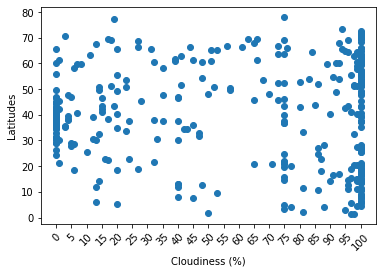

The correlation between both factors is -0.05


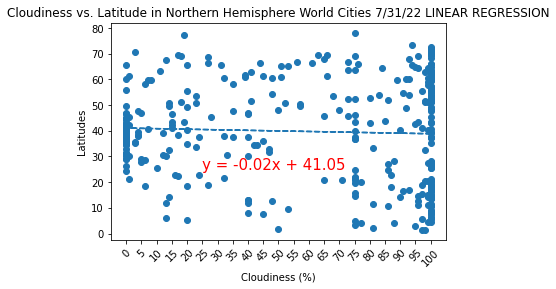

In [26]:
cloudinesses = cityweather_df[northern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(cloudinesses, latitudes)
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses) + 1, 5.0), rotation=45)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(cloudinesses, latitudes) 

a_fit = a_slope * cloudinesses + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(cloudinesses, latitudes)
plt.plot(cloudinesses, a_fit, "--")
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses) + 1, 5.0), rotation=45)

plt.title("Cloudiness vs. Latitude in Northern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, cloudinesses)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (25,25), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

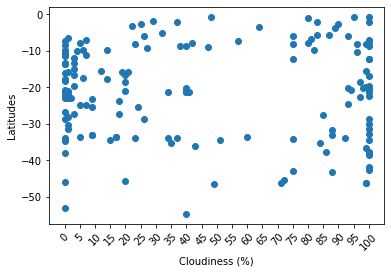

The correlation between both factors is -0.04


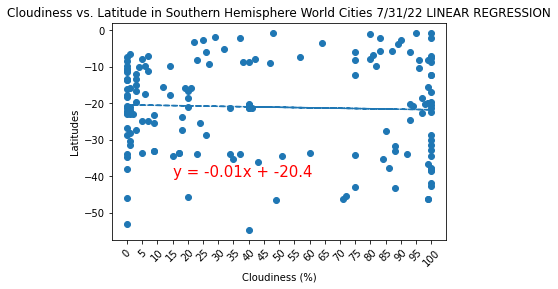

In [28]:
cloudinesses = cityweather_df[southern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(cloudinesses, latitudes)
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses) + 1, 5.0), rotation=45)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(cloudinesses, latitudes) 

a_fit = a_slope * cloudinesses + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(cloudinesses, latitudes)
plt.plot(cloudinesses, a_fit, "--")
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses) + 1, 5.0), rotation=45)

plt.title("Cloudiness vs. Latitude in Southern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, cloudinesses)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (15,-40), fontsize=15, color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

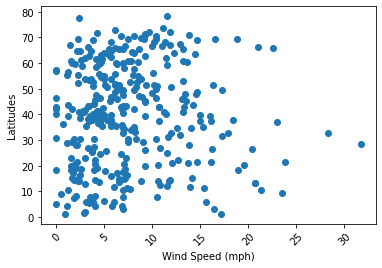

The correlation between both factors is 0.01


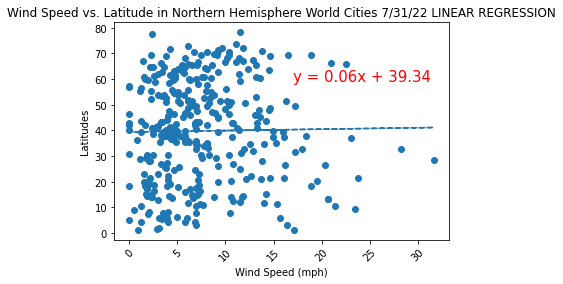

In [31]:
windspeeds = cityweather_df[northern_latitudes]["WIND_SPEED"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(windspeeds, latitudes)
plt.xticks(np.arange(min(windspeeds), max(windspeeds) + 1, 5.0), rotation=45)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(windspeeds, latitudes) 

a_fit = a_slope * windspeeds + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(windspeeds, latitudes)
plt.plot(windspeeds, a_fit, "--")
plt.xticks(np.arange(min(windspeeds), max(windspeeds) + 1, 5.0), rotation=45)

plt.title("Wind Speed vs. Latitude in Northern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, windspeeds)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (17,59), fontsize=15, color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

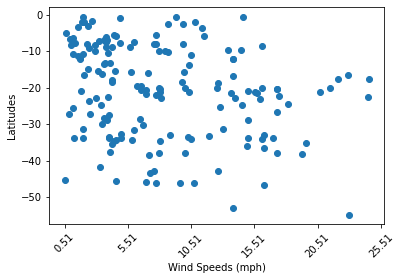

The correlation between both factors is -0.25


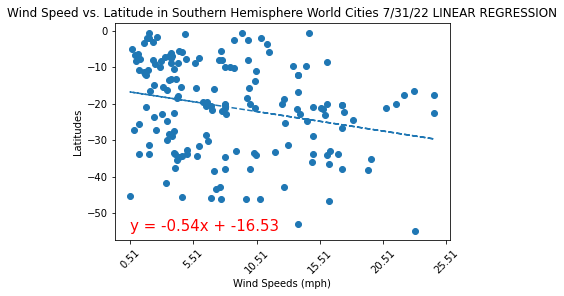

In [34]:
windspeeds = cityweather_df[southern_latitudes]["WIND_SPEED"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(windspeeds, latitudes)
plt.xticks(np.arange(min(windspeeds), max(windspeeds) + 1, 5.0), rotation=45)
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(windspeeds, latitudes) 

a_fit = a_slope * windspeeds + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(windspeeds, latitudes)
plt.plot(windspeeds, a_fit, "--")
plt.xticks(np.arange(min(windspeeds), max(windspeeds) + 1, 5.0), rotation=45)

plt.title("Wind Speed vs. Latitude in Southern Hemisphere World Cities 7/31/22 LINEAR REGRESSION")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitudes")

correlation = pearsonr(latitudes, windspeeds)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = f"y = {round(a_slope,2)}x + {round(a_int,2)}"

plt.annotate(line_eq, (.51,-55), fontsize=15, color="red")

plt.show()